## House Priceing 

#### Iteration 3, One Hot Encoding

In [18]:
house_it_3 = pd.read_csv('your_path/housing_iteration_3_classification.csv')


In [19]:
house_it_3

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1456,13175,85.0,1542,3,2,0,2,349,0,0,RL,Norm,GasA,Pave,Y,CBlock
1457,9042,66.0,1152,4,2,0,1,0,0,1,RL,Norm,GasA,Pave,Y,Stone
1458,9717,68.0,1078,2,0,0,1,366,0,0,RL,Norm,GasA,Pave,Y,CBlock


Numerical Columns:

These columns contain quantitative data, represented by numbers. They are typically used for calculations and statistical analysis.

    LotArea: Likely represents the area of the lot in square units. (Numerical)
    LotFrontage: Possibly the length of the street connected to the lot, in linear units. (Numerical)
    TotalBsmtSF: Total square footage of the basement area. (Numerical)
    BedroomAbvGr: Number of bedrooms above ground. (Numerical, although it represents count data)
    Fireplaces: Number of fireplaces in the property. (Numerical, count data)
    PoolArea: Area of the pool. (Numerical)
    GarageCars: The capacity of the garage in terms of the number of cars. (Numerical, count data)
    WoodDeckSF: Area of the wood deck. (Numerical)
    ScreenPorch: Area of the screen porch. (Numerical)
    Expensive: This looks like a binary numerical column, probably indicating whether a property is expensive (1) or not expensive (0).

Categorical Columns:

These columns represent qualitative data and are typically used for classification. They may contain text or numbers, but those numbers do not have mathematical meaning.

    MSZoning: Zoning classification. (Categorical)
    Condition1: Describes the condition of the property. (Categorical)
    Heating: Type of heating system in the property. (Categorical)
    Street: Type of road access to the property. (Categorical)
    CentralAir: Indicates whether the property has central air conditioning (likely "Y" for Yes, "N" for No). (Categorical)
    Foundation: Type of foundation of the property. (Categorical)

Remember, the classification of a column as numerical or categorical can depend on the specific context and how the data is used. For example, a column like BedroomAbvGr could be treated as categorical in some analyses (grouping properties by the number of bedrooms), even though it is numerical.

MSZoning: Identifies the general zoning classification of the sale. A Agriculture C Commercial FV Floating Village Residential I Industrial RH Residential High Density RL Residential Low Density RP Residential Low Density Park RM Residential Medium Density

Condition1: Proximity to various conditions

     Artery	Adjacent to arterial street
     Feedr	Adjacent to feeder street	
     Norm	Normal	
     RRNn	Within 200' of North-South Railroad
     RRAn	Adjacent to North-South Railroad
     PosN	Near positive off-site feature--park, greenbelt, etc.
     PosA	Adjacent to postive off-site feature
     RRNe	Within 200' of East-West Railroad
     RRAe	Adjacent to East-West Railroad

Heating: Type of heating

     Floor	Floor Furnace
     GasA	Gas forced warm air furnace
     GasW	Gas hot water or steam heat
     Grav	Gravity furnace	
     OthW	Hot water or steam heat other than gas
     Wall	Wall furnace

Street: Type of road access to property

     Grvl	Gravel	
     Pave	Paved

CentralAir: Central air conditioning

     N	No
     Y	Yes

Foundation: Type of foundation

     BrkTil	Brick & Tile
     CBlock	Cinder Block
     PConc	Poured Contrete	
     Slab	Slab
     Stone	Stone
     Wood	Wood



## X and Y Creation & Data Splitting

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [21]:
#X and y creation
x = house_it_3
y = x.pop("Expensive")

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

## Categorical Encoding - "MANUAL" Approach (Without using Pipelines)

Replacing NaNs in Categorical Features

For numerical data you impute the mean. This can't be done with categorical values as they don’t have a “mean”. Here, we will replace NaNs with a string that marks them: “N_A”.


In [22]:
#Selecting non-numerical columns
x_train_cat = x_train.select_dtypes(exclude="number")

#Defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant", 
                            fill_value="N_A").set_output(transform='pandas')

#Fitting and transforming
x_cat_imputed = cat_imputer.fit_transform(x_train_cat)

x_cat_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
318,RL,Norm,GasA,Pave,Y,PConc
580,RL,Norm,GasA,Pave,Y,CBlock
961,RL,PosN,GasA,Pave,Y,CBlock
78,RL,Norm,GasA,Pave,N,CBlock
5,RL,Norm,GasA,Pave,Y,Wood


## Replacing NaNs in Numerical Features

In [23]:
#Selecting numerical columns
x_train_num = x_train.select_dtypes(include="number")

#Imputing the mean
num_imputer = SimpleImputer(strategy="mean").set_output(transform='pandas')

#Fitting and transforming
x_num_imputed = num_imputer.fit_transform(x_train_num)

x_num_imputed.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0
580,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0
961,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0
78,10778.0,72.00000,1768.0,4.0,0.0,0.0,0.0,0.0,0.0
5,14115.0,85.00000,796.0,1.0,0.0,0.0,2.0,40.0,0.0


### Concatenating All Columns 

In [24]:
#Concatenating all columns
x_imputed = pd.concat([x_cat_imputed, x_num_imputed], axis=1)

x_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,RL,Norm,GasA,Pave,Y,PConc,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0
580,RL,Norm,GasA,Pave,Y,CBlock,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0
961,RL,PosN,GasA,Pave,Y,CBlock,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0
78,RL,Norm,GasA,Pave,N,CBlock,10778.0,72.00000,1768.0,4.0,0.0,0.0,0.0,0.0,0.0
5,RL,Norm,GasA,Pave,Y,Wood,14115.0,85.00000,796.0,1.0,0.0,0.0,2.0,40.0,0.0


## One Hot Encoding

One Hot encoding means creating a new binary column for each category in every categorical column. Fortunately, a Scikit-Learn transformer takes care of everything.


Fitting the OneHotEncoder. As with any transformer, we have to:

    1.Import it
    2.Initialize it
    3.Fit it to the data
    4.Use it to transform the data



In [25]:
#Import
from sklearn.preprocessing import OneHotEncoder

#Initialize
my_onehot = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

#Fit
my_onehot.fit(x_cat_imputed)

#Transform
x_cat_imputed_onehot = my_onehot.transform(x_cat_imputed)

In [26]:
x_cat_imputed_onehot.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,...,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
580,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
961,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Concatenating "One-Hot" Columns and Numerical Columns 

In [27]:
x_imputed = pd.concat([x_cat_imputed_onehot, x_num_imputed], axis=1)

x_imputed.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,...,Foundation_Wood,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0
580,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0
961,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0


## Categorical Encoding - "Automated" Approach (Using Pipelines)

All the steps in the manual approach can be synthetised by using Scikit-Learn Pipelines and specifically something called `ColumnTransformer`, which allows you to apply different transformations to two or more groups of columns: in our case, categorical and numerical columns.

This process is also called creating "branches" in the pipeline. One branch for the categorical columns and another for the numerical columns. Each branch will contain as many transformers as we want. Then, the branches will meet again, and the transformed columns will be automatically concatenated.

### Creating the "Numeric Pipe" and the "Categoric Pipe"

In [28]:
# select categorical and numerical column names
x_cat_columns = x.select_dtypes(exclude="number").copy().columns
x_num_columns = x.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

In [29]:
categoric_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N_A', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### Using ColumnTransformer a Pipeline with 2 Branches

In [30]:
#Import
from sklearn.compose import ColumnTransformer

#Created the columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, x_num_columns), #1 branch called "num_pipe", will apply the steps in the numeric_pipe to the columns named in x_num_columns
        ("cat_pipe", categoric_pipe, x_cat_columns), #2 branch called "cat_pipe", will apply the steps in the categoric_pipe to the columns named in x_cat_columns
    ]
)

### Creating the Full_Pipeline

In [31]:
full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeClassifier()).set_output(transform='pandas')

In [32]:
full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [33]:
full_pipeline.predict(x_train)

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

## Using the new Pipeline(with branches) to train a DecisionTree with GridSearch Cross Validation.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
full_pipeline = make_pipeline(preprocessor,
                              StandardScaler(), 
                              DecisionTreeClassifier()).set_output(transform='pandas')


In [39]:
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "standardscaler__with_mean":[True, False],
    "standardscaler__with_std":[True, False],
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}

In [40]:
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')


In [41]:
search.fit(x_train, y_train)

Fitting 5 folds for each of 5120 candidates, totalling 25600 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=...
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=1)

In [42]:
# training accuracy
y_train_pred = search.predict(x_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

train_accuracy_rounded = round(train_accuracy, 4)

print("The training data prediction is {:.2%} accurate".format(train_accuracy_rounded))

The training data prediction is 94.09% accurate


In [43]:
# testing accuracy
y_test_pred = search.predict(x_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

test_accuracy_rounded = round(test_accuracy, 4)

print("The test data prediction is {:.2%} accurate".format(test_accuracy_rounded))

The test data prediction is 90.75% accurate


In [47]:
search.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=38)

In [51]:
print("Number of features in x_train:", len(x_train.columns))



Number of features in x_train: 15


In [53]:
# Assuming 'search' is your GridSearchCV or RandomizedSearchCV object
# and it has been fitted

# Get the fitted DecisionTreeClassifier object
decision_tree_model = search.best_estimator_.named_steps['decisiontreeclassifier']

# The number of features in the fitted model can be found using the tree_ attribute
num_features_in_model = decision_tree_model.tree_.n_features

print("Number of features used in the decision tree model:", num_features_in_model)


Number of features used in the decision tree model: 39


Given that the decision tree model used 39 features but your original x_train dataset only had 15 columns, it's clear that the data underwent transformations that increased the number of features. This is common when using encoders like OneHotEncoder in your pipeline, which expand categorical features into multiple binary features.

To properly plot your decision tree with the correct feature names, you need to:

    Obtain the Transformed Feature Names: You need to extract the feature names after all transformations. This can be a bit complex, especially if you're using a Pipeline with a ColumnTransformer.

    Match the Transformed Feature Names with the Model: Ensure that the list of feature names you obtain after transformation aligns with the 39 features used by your decision tree model.

Here's a general approach to extract the feature names after transformation:

In [55]:
# Assuming 'search' is your GridSearchCV or RandomizedSearchCV object
# and it contains a pipeline with transformers

# Access the fitted pipeline from the best_estimator_ of your search object
fitted_pipeline = search.best_estimator_

# If you have a ColumnTransformer in your pipeline, replace 'columntransformer' with its step name
# This will give you the fitted ColumnTransformer
column_transformer = fitted_pipeline.named_steps['columntransformer']

# Initialize an empty list to collect feature names
transformed_feature_names = []

# Loop through transformers in the ColumnTransformer
for transformer in column_transformer.transformers_:
    transformer_name, transformer_obj, columns = transformer

    # Handle different types of transformers
    if hasattr(transformer_obj, 'get_feature_names_out'):
        # For transformers with get_feature_names_out method
        transformed_feature_names.extend(transformer_obj.get_feature_names_out(columns))
    else:
        # For transformers without get_feature_names_out (like SimpleImputer)
        transformed_feature_names.extend(columns)

# Now transformed_feature_names should have the correct feature names


[Text(0.594758064516129, 0.9285714285714286, 'GarageCars <= 0.993\nentropy = 0.609\nsamples = 1168\nvalue = [993, 175]\nclass = Not Expensive'),
 Text(0.38306451612903225, 0.7857142857142857, 'TotalBsmtSF <= 0.862\nentropy = 0.374\nsamples = 1025\nvalue = [951, 74]\nclass = Not Expensive'),
 Text(0.18548387096774194, 0.6428571428571429, 'Fireplaces <= -0.165\nentropy = 0.225\nsamples = 907\nvalue = [874, 33]\nclass = Not Expensive'),
 Text(0.0967741935483871, 0.5, 'TotalBsmtSF <= 0.542\nentropy = 0.053\nsamples = 499\nvalue = [496, 3]\nclass = Not Expensive'),
 Text(0.06451612903225806, 0.35714285714285715, 'Condition1_RRAn <= 3.38\nentropy = 0.022\nsamples = 477\nvalue = [476, 1]\nclass = Not Expensive'),
 Text(0.03225806451612903, 0.21428571428571427, 'entropy = 0.0\nsamples = 467\nvalue = [467, 0]\nclass = Not Expensive'),
 Text(0.0967741935483871, 0.21428571428571427, 'entropy = 0.469\nsamples = 10\nvalue = [9, 1]\nclass = Not Expensive'),
 Text(0.12903225806451613, 0.3571428571428

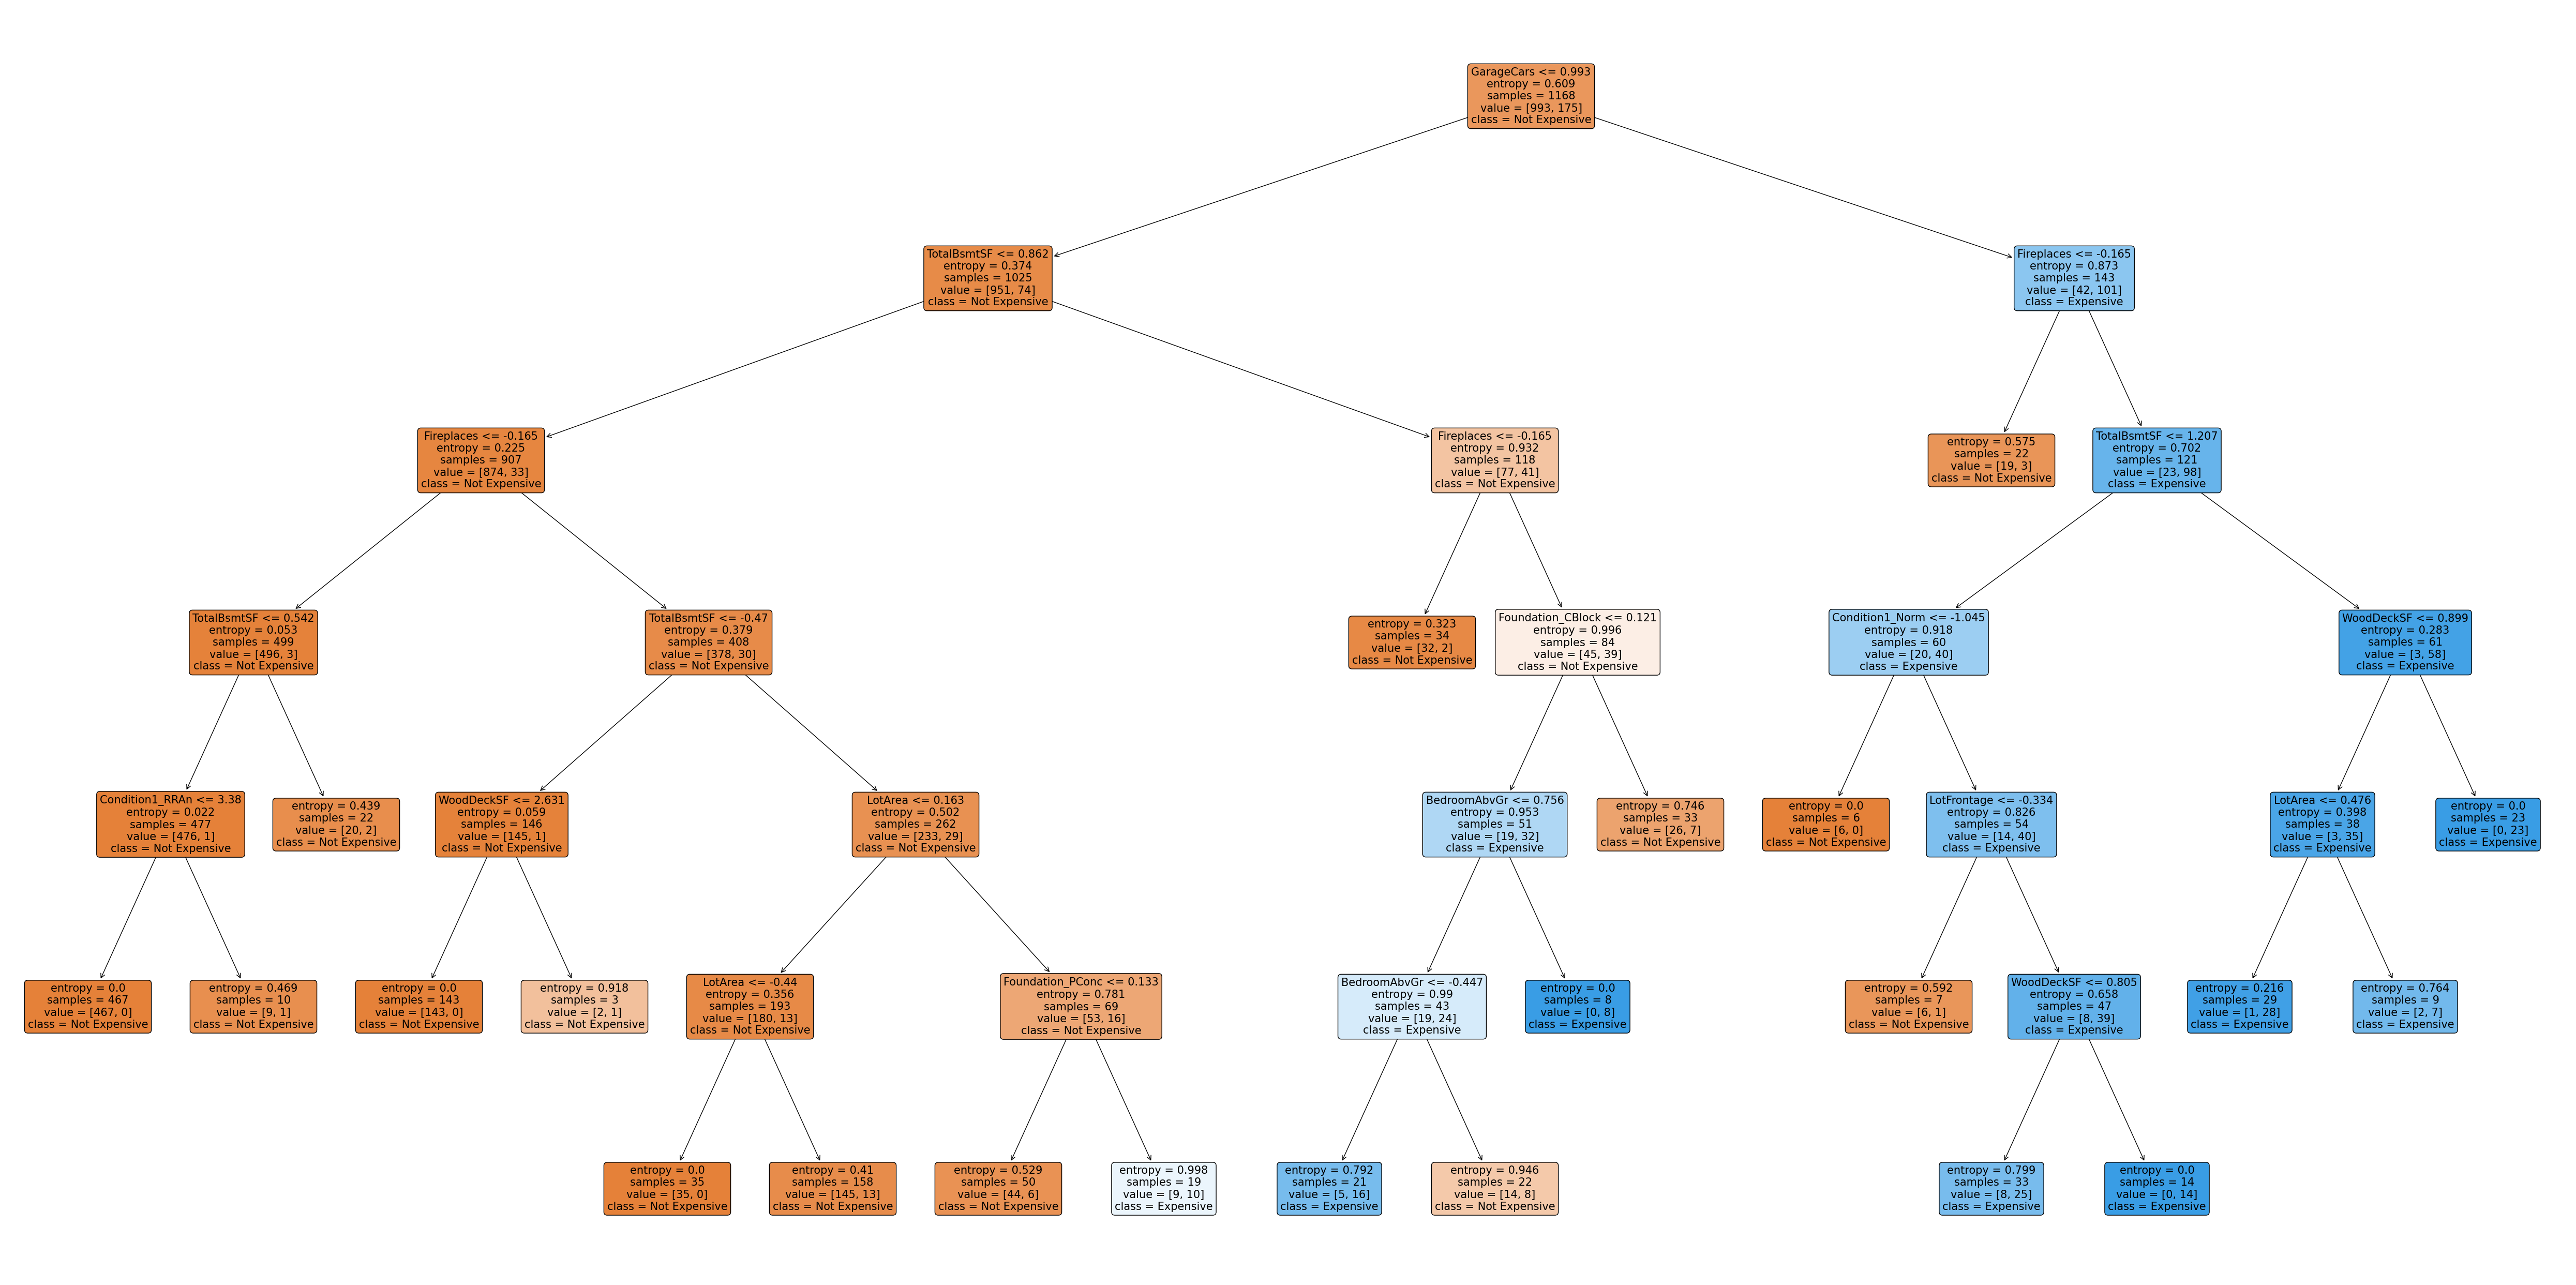

In [57]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(64, 32))
plot_tree(
    search.best_estimator_.named_steps['decisiontreeclassifier'],
    filled=True,
    rounded=True,
    class_names=['Not Expensive', 'Expensive'],
    feature_names=transformed_feature_names  # Use the correct feature names
)
